(1):
1.Simple Linear Regression involves a model with only one predictor variable and one outcome variable, used to describe the relationship between the two. Its typical form is Y=β0+β1X, where Y is the outcome variable, X is the predictor variable, β0 is the intercept, and β1 is the coefficient of the predictor. Multiple Linear Regression, on the other hand, expands this model to include multiple predictor variables, represented as Y=β0+β1X1+β2X2+⋯+βnXn. The advantage of Multiple Linear Regression is that it allows for a more comprehensive analysis by considering the impact of several factors on the outcome variable, providing deeper insights.

2.A continuous variable is a numeric variable that can take any value within a certain range, such as age or income. An indicator variable, however, is a binary variable that typically takes values of 0 or 1 to represent category information, such as gender (0 for male, 1 for female). In Simple Linear Regression, using a continuous variable results in a standard linear relationship equation, such as Y=β0+β1X. When using an indicator variable, the model can reflect differences between categories, such as Y=β0+β1×indicator, where the indicator variable reflects the impact of belonging to a particular group.

3.When an indicator variable is added to a Simple Linear Regression model, turning it into a Multiple Linear Regression, the model’s behavior changes. Simple Linear Regression accounts for the effect of a single predictor, while Multiple Linear Regression can distinguish between different groups within the data. For example, adding a gender indicator variable allows the model to account for differences between male and female outcomes, providing a more nuanced analysis that highlights group-specific differences.

4.In Multiple Linear Regression, adding an interaction term between a continuous and an indicator variable allows the model to capture the combined effect of these two variables. This interaction term reveals how the influence of one variable varies based on the category of the other. For instance, in a model with income and gender, the interaction term can show how the effect of income differs between genders, illustrating how one variable’s impact can vary across different categories.

5.For categorical variables with more than two categories, such as occupation type or education level, multiple binary indicator variables are created (typically one less than the number of categories) with one category serving as a baseline. In this context, the interpretation of the model is relative to the baseline category, with each indicator variable showing the deviation from this baseline. For example, if the model includes different occupations, the baseline might be "Teacher," and each indicator variable for other occupations (like "Engineer" or "Doctor") would reflect how those occupations differ from the baseline. 

https://chatgpt.com/share/67367f4d-1970-8001-a259-eb1f538e1d6f

(2):
In a model without the interaction term, the impact of TV and online advertising budgets on the outcome (effectiveness of advertising) is considered to be independent. The linear equation can be represented as:
Effectiveness=β0+β1×TV Budget+β2×Online Budget 
In this model, an increase in the TV advertising budget has a consistent effect on effectiveness, regardless of changes in the online advertising budget, and vice versa. This model assumes the effects of both advertising methods are additive, with no synergy or interference between them.

In a model with the interaction term, the budgets for TV and online advertising are considered to influence each other’s effectiveness. The equation now includes an interaction term and can be written as:
Effectiveness=β0+β1×TV Budget+β2×Online Budget+β3×(TV Budget×Online Budget)
This interaction term (β3×(TV Budget×Online Budget)) indicates that the effect of the TV budget on effectiveness may change depending on the online budget and vice versa. Therefore, the model with an interaction term can better capture any synergistic or antagonistic effects between the two advertising channels. 


If the advertising budgets are categorized as "high" or "low," turning them into binary variables (indicator variables), the model would need to be adjusted. We can use indicator variables to represent the “high” or “low” status, for example:
TV (High)=1 if the TV advertising budget is high, and TV (High)=0 if the budget is low; Online (High)=1 if the online advertising budget is high, and online (High)=0 if the budget is low.
Without Interaction: The model can be written as:
Effectiveness=β0+β1×TV (High)+β2×Online (High)
In this model, the effects of high and low budgets are independent of each other.
With Interaction: In this case, an interaction term can be added to capture the combined effect when both budgets are high. The model would look like:
Effectiveness=β0+β1×TV (High)+β2×Online (High)+β3×(TV (High)×Online (High))
In this model, the interaction term captures the synergistic or inhibitive effect when both advertising budgets are high. This allows the model to more flexibly reflect the combined impact of high budgets for both advertising methods, potentially leading to more accurate predictions of the advertising effectiveness.

Optimization terminated successfully.
         Current function value: 0.232266
         Iterations 7
Additive Model Summary:
                           Logit Regression Results                           
Dep. Variable:           is_fire_type   No. Observations:                  800
Model:                          Logit   Df Residuals:                      791
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.03427
Time:                        23:23:12   Log-Likelihood:                -185.81
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                    0.1055
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3503      0.516     -4.552      0.000      

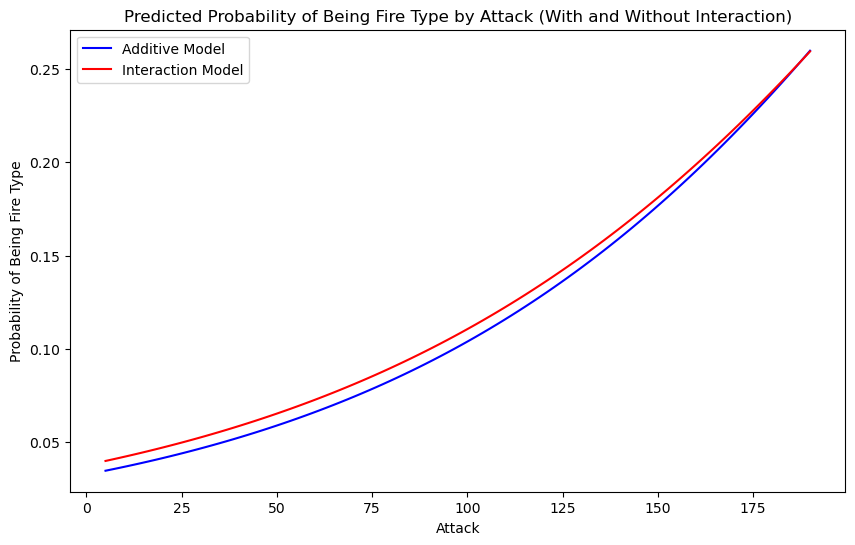

In [4]:
#（3）：
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
data = pd.read_csv(url).fillna('None')

# Create a binary outcome variable indicating if the Pokémon type is Fire
data['is_fire_type'] = (data['Type 1'] == 'Fire').astype(int)

# 1. Additive Model: Define the formula and fit a logistic regression model
formula_additive = 'is_fire_type ~ Attack + Legendary + Defense + C(Generation)'
model_additive = smf.logit(formula_additive, data=data).fit()
print("Additive Model Summary:")
print(model_additive.summary())

# 2. Interaction Model: Define the formula with an interaction term and fit the logistic regression model
formula_interaction = 'is_fire_type ~ Attack + Legendary + Defense + C(Generation) + Attack:Defense'
model_interaction = smf.logit(formula_interaction, data=data).fit()
print("\nInteraction Model Summary:")
print(model_interaction.summary())

# 3. Compare AIC values of the models
print("\nModel Comparison:")
print("Additive Model AIC:", model_additive.aic)
print("Interaction Model AIC:", model_interaction.aic)

# 4. Visualize the predicted probabilities from the additive and interaction models
# Create a new dataframe for predictions
attack_range = np.linspace(data['Attack'].min(), data['Attack'].max(), 100)
defense_value = data['Defense'].median()  # Set Defense to the median value
pred_data = pd.DataFrame({
    'Attack': attack_range,
    'Legendary': 0,         # Assume non-legendary Pokémon
    'Defense': defense_value,
    'Generation': 1         # Assume Generation 1
})

# Predict probabilities using the additive model
pred_data['Probability_Additive'] = model_additive.predict(pred_data)

# Predict probabilities using the interaction model
pred_data['Probability_Interaction'] = model_interaction.predict(pred_data)

# Plot the predicted probabilities
plt.figure(figsize=(10, 6))
plt.plot(pred_data['Attack'], pred_data['Probability_Additive'], label='Additive Model', color='blue')
plt.plot(pred_data['Attack'], pred_data['Probability_Interaction'], label='Interaction Model', color='red')
plt.xlabel('Attack')
plt.ylabel('Probability of Being Fire Type')
plt.legend()
plt.title('Predicted Probability of Being Fire Type by Attack (With and Without Interaction)')
plt.show()


Output
Additive Model Summary and Interaction Model Summary: These summaries display coefficients and significance levels for each model, showing which predictors have a significant effect on the outcome.
Model Comparison: Displays the AIC values for both models to help with model selection.
Visualization: Shows the effect of Attack on the probability of being a Fire-type Pokémon, comparing predictions from the additive and interaction models.

(4):
R-squared (the coefficient of determination) measures the proportion of the variance in the outcome variable explained by the model as a whole. An R-squared of 17.6% indicates that the model accounts for only 17.6% of the total variability in the outcome, suggesting limited explanatory power.
P-values for the coefficients test the null hypothesis for each predictor, assessing whether each predictor has a statistically significant effect on the outcome variable, controlling for other predictors. A p-value less than 0.01 for a coefficient indicates strong evidence against the null hypothesis, suggesting that the predictor has a significant impact on the outcome.

Why this is not contradictory
R-squared and p-values address different aspects of the model. R-squared reflects the overall explanatory power of the model, while p-values assess the individual significance of each predictor when all other variables are held constant.
Therefore, it is possible to have a low R-squared while still having significant p-values for individual predictors. This means that, although the model as a whole does not explain much of the variability in the outcome, certain predictors still have significant relationships with the outcome variable.

（5）：
1.This cell sets up the data for modeling by:
Filling missing values in the "Type 2" column with "None".Splitting the data into a 50/50 split for training and testing, ensuring that the model will be evaluated on both in-sample (training) data and out-of-sample (test) data.This split is essential for understanding how well the model generalizes since the model will be trained on one subset of the data (training set) and tested on the other (test set).

This cell illustrates the importance of data splitting in machine learning, allowing for separate evaluations of model performance on training (in-sample) and test (out-of-sample) data.

2.Defines a simple linear regression model with HP as the dependent variable and Attack and Defense as predictors.
Fits this model to the training data.The summary output (not shown here) provides details about the model's coefficients, R-squared value for in-sample data, p-values, and other statistical metrics.

This step shows the initial model fitting process, using only a subset of predictors to create a straightforward model.The model’s in-sample R-squared will be used as a baseline to evaluate how well the model fits the training data and to compare it to out-of-sample performance in later cells.

3.Computes the in-sample R-squared, which measures how well the model explains the variability in the training data.Calculates the out-of-sample R-squared by predicting HP for the test data (pokeaman_test) and comparing it to the actual values. The out-of-sample R-squared is computed using the correlation coefficient between the actual and predicted values in the test set.

By comparing the in-sample and out-of-sample R-squared, this cell demonstrates the model’s generalizability.
A large gap between in-sample and out-of-sample R-squared (e.g., in-sample R-squared much higher than out-of-sample) would suggest overfitting, where the model performs well on training data but poorly on new data.
If the values are similar, it indicates the model generalizes well, meaning it captures underlying patterns rather than just memorizing the training data.

4.Builds a more complex model by adding additional predictors (Speed, Legendary) and an interaction term between Sp. Def and Sp. Atk.Fits this extended model to the training data.The summary output provides the in-sample R-squared for the extended model, as well as coefficient estimates and p-values for each predictor and interaction term.

This cell illustrates how adding complexity to a model (more variables and interactions) can potentially improve in-sample fit (higher R-squared), capturing more variability in the training data.
However, this complexity may lead to overfitting, where the model is too tailored to the training data and may not generalize well to new data, which will be assessed in the next cell.

5.Similar to Cell 3, this cell calculates both in-sample and out-of-sample R-squared values for the extended model.
Compares the model’s fit on the training data (in-sample) to its performance on the test data (out-of-sample).
Purpose:

This cell demonstrates how adding more variables and interactions can affect generalizability.If the in-sample R-squared is high but the out-of-sample R-squared remains low or drops significantly, it indicates that the model is overfitting.If both R-squared values are close, the model is likely generalizing well to new data.


（6）：
The model4_linear_form specification creates a complex model that includes multiple predictors and interaction terms, resulting in the generation of new predictor variables in the design matrix, model4_spec.exog. This design matrix represents all the independent variables (including interactions) used in the regression model to predict the outcome variable, represented as model4_spec.endog. Each column of model4_spec.exog corresponds to a unique predictor or interaction term defined in model4_linear_form.

When these predictors have high correlations with each other, a situation known as multicollinearity arises. This multicollinearity is evident when examining np.corrcoef(model4_spec.exog), which reveals high correlations among the predictor variables in model4. High multicollinearity inflates the variance of the coefficient estimates, making them highly sensitive to changes in the data. Consequently, the model may fit the training data very well but become unstable and unreliable on new, unseen data.

This lack of "out-of-sample" generalization occurs because the model's predictions are too dependent on the specific relationships within the training data. As a result, even slight differences in test data lead to significant changes in the predictions, indicating poor generalizability.

In other words,the model4_linear_form generates a design matrix with numerous predictors and interaction terms. High multicollinearity in this design matrix causes instability in coefficient estimates, making the model highly sensitive to the training data. This sensitivity prevents the model from generalizing well to out-of-sample data, as small changes in the data result in large variations in predictions, reflecting overfitting to the training set.

（7）：
From model3_fit and model4_fit to model5_linear_form:
Principle: Start with a reasonable level of complexity.
Rationale: model5_linear_form was extended from simpler models (model3_fit and model4_fit) by adding variables that might enhance prediction accuracy without overwhelming the model. This step introduces additional variables (such as specific categorical indicators and interaction terms) to capture more complex relationships but remains mindful of not overcomplicating the model.

From model5_linear_form to model6_linear_form:
Principle: Add significant predictors identified in previous models.
Rationale: After assessing model5_linear_form, significant predictors were added to model6_linear_form, focusing on categorical indicators and specific levels of variables (like Type and Generation). The goal was to enhance model precision by including only variables with demonstrated predictive value, improving model interpretability and reducing the risk of multicollinearity by avoiding redundant predictors.

From model6_linear_form to model7_linear_form:
Principle: Refine and center/scale continuous predictors to improve stability.
Rationale: model7_linear_form was extended from model6_linear_form by centering and scaling continuous predictors (Attack and Speed) to further mitigate multicollinearity. By reducing the condition number, this approach aims to make the model more stable and robust for out-of-sample generalization, balancing complexity with better interpretability and predictive performance.

The progression from model5 to model7 involves gradually refining the model by introducing relevant predictors, using significant variables, and controlling for multicollinearity through centering and scaling. This stepwise approach helps to improve the model’s performance and generalizability without overfitting, ensuring stability and reliability in predictions across both in-sample and out-of-sample data.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Create a sample dataset
np.random.seed(130)
songs = pd.DataFrame({
    'danceability': np.random.rand(100),
    'energy': np.random.rand(100),
    'loudness': np.random.rand(100),
    'mode': np.random.choice([0, 1], 100)  # Binary variable for mode
})

# Set loop parameters
reps = 100  # Number of repetitions
linear_form = 'danceability ~ energy + loudness + energy * mode'  # Linear model formula

# Arrays to store R-squared values
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

# Loop to perform multiple train-test splits and collect R-squared values
for i in range(reps):
    # Randomly split the data into 50% training and 50% testing sets
    songs_training_data, songs_testing_data = train_test_split(songs, train_size=0.5)

    # Fit the model on the training data
    final_model_fit = smf.ols(formula=linear_form, data=songs_training_data).fit()
    
    # Calculate in-sample R-squared
    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    # Calculate out-of-sample R-squared
    yhat_model = final_model_fit.predict(songs_testing_data)
    y_test = songs_testing_data['danceability']
    out_of_sample_Rsquared[i] = np.corrcoef(y_test, yhat_model)[0, 1] ** 2

# Create a DataFrame to hold the results
df = pd.DataFrame({
    "In Sample Performance (R-squared)": in_sample_Rsquared,
    "Out of Sample Performance (R-squared)": out_of_sample_Rsquared
})

# Plot in-sample vs. out-of-sample R-squared values
fig = px.scatter(
    df, 
    x="In Sample Performance (R-squared)", 
    y="Out of Sample Performance (R-squared)", 
    title="In-Sample vs Out-of-Sample R-squared",
    labels={"x": "In Sample R-squared", "y": "Out of Sample R-squared"}
)

# Add a reference line (y=x) to compare in-sample and out-of-sample performance
fig.add_shape(
    type="line", 
    x0=0, y0=0, x1=1, y1=1, 
    line=dict(dash="dash"),
    xref="x", yref="y"
)

fig.show()


This demonstration evaluates the model’s generalizability by comparing its performance on training data (in-sample) and testing data (out-of-sample) across multiple random splits. By examining both in-sample and out-of-sample R-squared values, we can identify whether the model is overfitting—performing well on training data but poorly on new data—or if it generalizes well, meaning it performs consistently across different data splits. A well-generalized model shows similar R-squared values for both in-sample and out-of-sample data, indicating it has captured underlying patterns in the data rather than just memorizing specifics of the training set. This process provides insight into the model’s stability and reliability when exposed to new data, which is essential for making accurate predictions in real-world applications.

（9）：
Model Complexity vs. Generalizability: The progression from model6 to model7 represents increasing model complexity by adding interactions and additional predictors. However, as complexity increases, the models might overfit the training data, leading to poorer generalization on unseen or future data. This can be observed through in-sample and out-of-sample R-squared values, where high in-sample R-squared coupled with low out-of-sample R-squared indicates overfitting.

Parsimonious Models and Interpretability: Model6, being simpler than model7, is favored from a generalizability and interpretability perspective. While model7 might capture more intricate relationships in the training data, it also introduces challenges in understanding and explaining the results due to higher interaction terms. This emphasis on simplicity supports the idea that a parsimonious model often achieves a better balance between predictive performance and interpretability.

Implications for Model Selection: The illustration suggests that for real-world applications, especially those involving future predictions, opting for a simpler model like model6 may be more beneficial. This is because simpler models are less prone to capturing random noise in the training data and are likely to provide more stable and reliable predictions.

https://chatgpt.com/share/67367f4d-1970-8001-a259-eb1f538e1d6f